# **PCOS Lifestyle Impact Prediction**

# This Jupyter notebook implements a series of machine learning models to predict the likelihood of PCOS based on lifestyle factors. The models used include Random Forest, Decision Trees, Logistic Regression, and MLP. The dataset is preprocessed, features are engineered, and the models are evaluated for accuracy.

# **Loading and Initial Dataset Checks**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
import gradio as gr
from keras.src.layers import Dense, Dropout
from keras import Sequential



# **Load the Dataset**

# Load the dataset from the CSV file

In [2]:
data = pd.read_csv("input/Cleaned-Data.csv")
print("Initial dataset shape:", data.shape)

Initial dataset shape: (173, 36)


# **Data Preprocessing and Validation**

In [3]:
print(data.describe())
data.info()
data.head()

        Weight_kg   Height_ft  Diet_Bread_Cereals  Diet_Milk_Products  \
count  173.000000  173.000000          173.000000          173.000000   
mean    56.549711  160.636647            5.445087            3.647399   
std     12.025369    7.287373            2.116832            2.548930   
min     36.000000  124.460000            0.000000            0.000000   
25%     49.000000  157.480000            4.000000            1.000000   
50%     55.000000  160.020000            7.000000            3.000000   
75%     64.000000  165.100000            7.000000            7.000000   
max    115.000000  182.880000            7.000000            7.000000   

       Diet_Fruits  Diet_Vegetables  Diet_Starchy_Vegetables  \
count   173.000000       173.000000               173.000000   
mean      3.034682         3.439306                 3.069364   
std       2.048527         1.769596                 1.857054   
min       0.000000         0.000000                 0.000000   
25%       1.000000    

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,...,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication
0,20-25,66.0,157.48,Unmarried,No,No,Yes,No,No,No,...,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,Somewhat,No.
1,Less than 20,56.0,165.10,Unmarried,No,No,No,No,No,No,...,0,No,Daily,No Exercise,Less than 30 minutes,6-8 hours,No,No,Somewhat,No.
2,Less than 20,89.0,167.64,Unmarried,No,Yes,No,No,No,Yes,...,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.
3,20-25,55.0,160.02,Unmarried,No,Yes,No,Yes,No,Yes,...,1,No,Never,No Exercise,Not Applicable,6-8 hours,Yes,No,Somewhat,No.
4,Less than 20,55.0,160.02,Unmarried,No,No,No,No,No,No,...,0,No,Daily,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,6-8 hours,Yes,No,Not at All,No.


# Check for missing values

In [4]:
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Age                           0
Weight_kg                     0
Height_ft                     0
Marital_Status                0
PCOS                          0
Family_History_PCOS           0
Menstrual_Irregularity        0
Hormonal_Imbalance            0
Hyperandrogenism              0
Hirsutism                     0
Mental_Health                 0
Conception_Difficulty         0
Insulin_Resistance            0
Diabetes                      0
Childhood_Trauma              0
Cardiovascular_Disease        0
Diet_Bread_Cereals            0
Diet_Milk_Products            0
Diet_Fruits                   0
Diet_Vegetables               0
Diet_Starchy_Vegetables       0
Diet_NonStarchy_Vegetables    0
Diet_Fats                     0
Diet_Sweets                   0
Diet_Fried_Food               0
Diet_Tea_Coffee               0
Diet_Multivitamin             0
Vegetarian                    0
Exercise_Frequency            0
Exercise_Type                 0
Exercise_Dur

# Impute missing values with median for numerical columns

In [5]:
numerical_cols = data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Check again after imputation

In [6]:
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
Age                           0
Weight_kg                     0
Height_ft                     0
Marital_Status                0
PCOS                          0
Family_History_PCOS           0
Menstrual_Irregularity        0
Hormonal_Imbalance            0
Hyperandrogenism              0
Hirsutism                     0
Mental_Health                 0
Conception_Difficulty         0
Insulin_Resistance            0
Diabetes                      0
Childhood_Trauma              0
Cardiovascular_Disease        0
Diet_Bread_Cereals            0
Diet_Milk_Products            0
Diet_Fruits                   0
Diet_Vegetables               0
Diet_Starchy_Vegetables       0
Diet_NonStarchy_Vegetables    0
Diet_Fats                     0
Diet_Sweets                   0
Diet_Fried_Food               0
Diet_Tea_Coffee               0
Diet_Multivitamin             0
Vegetarian                    0
Exercise_Frequency            0
Exercise_Type                 0
Exerci

# **Label Encoding Categorical Features**

In [7]:
categorical_cols = data.drop(columns=['PCOS']).select_dtypes(include=['object']).columns
data_encoded = data.copy()

# Use separate LabelEncoder for each column to avoid conflicts

In [8]:
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])


# Convert target variable 'PCOS' to numerical (1/0)

In [9]:
data_encoded['PCOS'] = data_encoded['PCOS'].map({'Yes': 1, 'No': 0})

# **Critical: Target Validation**

In [10]:
target_counts = data_encoded['PCOS'].value_counts()
print("\nTarget distribution after encoding:")
print(target_counts)


Target distribution after encoding:
PCOS
0.0    134
1.0     38
Name: count, dtype: int64


# **Feature Engineering**

# Calculate BMI

In [11]:
data_encoded.loc[:, 'Height_m'] = data_encoded['Height_ft'] * 0.3048
data_encoded.loc[:, 'BMI'] = data_encoded['Weight_kg'] / (data_encoded['Height_m'] ** 2)

# Calculate Nutritional Score

In [12]:
nutrition_weights = {
    'Diet_Bread_Cereals': 1,
    'Diet_Milk_Products': 1,
    'Diet_Fruits': 2,
    'Diet_Vegetables': 2,
    'Diet_Starchy_Vegetables': -1,
    'Diet_NonStarchy_Vegetables': 2,
    'Diet_Fats': -2,
    'Diet_Sweets': -3,
    'Diet_Fried_Food': -3,
    'Diet_Tea_Coffee': 0,
}
data_encoded.loc[:, 'Nutritional_Score'] = data_encoded[nutrition_weights.keys()].dot(pd.Series(nutrition_weights))

# **Data Splitting**

In [13]:
features = data_encoded.drop(columns=['PCOS'])
target = data_encoded['PCOS']

# Stratified split to maintain class distribution

In [14]:
print("Missing values in target variable (PCOS):")
print(target.isnull().sum())

# Remove rows where the target variable 'PCOS' is NaN
data_cleaned = data_encoded.dropna(subset=['PCOS'])
features_cleaned = data_cleaned.drop(columns=['PCOS'])
target_cleaned = data_cleaned['PCOS']

X_train, X_test, y_train, y_test = train_test_split(
    features_cleaned, target_cleaned, 
    test_size=0.2, 
    random_state=42, 
    stratify=target_cleaned
)


Missing values in target variable (PCOS):
1


# **Feature Scaling**

In [15]:
scaler = StandardScaler()
numerical_cols = features.select_dtypes(include=[np.number]).columns

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# **Model Training and Hyperparameter Tuning**

In [16]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Hyperparameter tuning using GridSearchCV for Random Forest

In [17]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

# MLP Hyperparameter Tuning

In [18]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30)],
    'alpha': [0.0001, 0.001]
}
mlp_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid_mlp, cv=5)
mlp_search.fit(X_train, y_train)
best_mlp = mlp_search.best_estimator_

# **Evaluation of All Models**

# Evaluate the models

In [19]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8857
Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        27
         1.0       0.83      0.62      0.71         8

    accuracy                           0.89        35
   macro avg       0.86      0.79      0.82        35
weighted avg       0.88      0.89      0.88        35


Decision Tree Accuracy: 0.7429
Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       0.95      0.70      0.81        27
         1.0       0.47      0.88      0.61         8

    accuracy                           0.74        35
   macro avg       0.71      0.79      0.71        35
weighted avg       0.84      0.74      0.76        35


Logistic Regression Accuracy: 0.7429
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.91      0.74      0.82        27
   

# Final Evaluation with the best model

In [20]:
y_pred_rf = best_rf.predict(X_test)
y_pred_mlp = best_mlp.predict(X_test)

print("\nBest Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nBest MLP Test Accuracy:", accuracy_score(y_test, y_pred_mlp))


Best Random Forest Test Accuracy: 0.9142857142857143

Best MLP Test Accuracy: 0.7428571428571429


# **Model Evaluation Metrics**

# Confusion Matrix for Random Forest

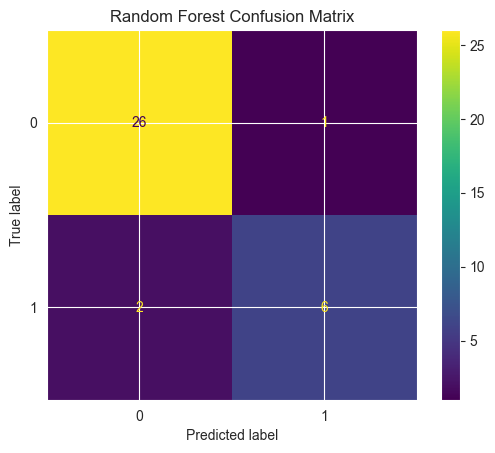

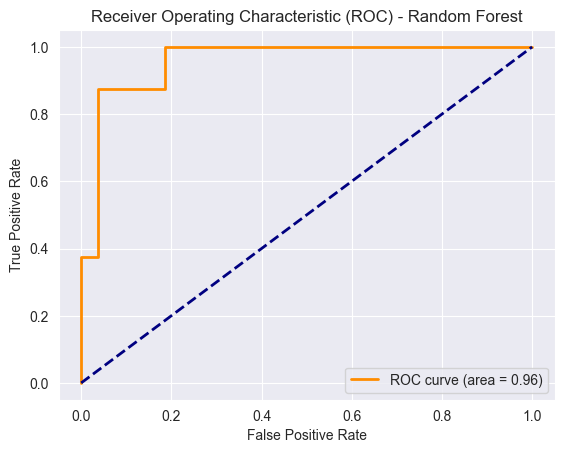

In [21]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

# ROC-AUC for Random Forest
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve

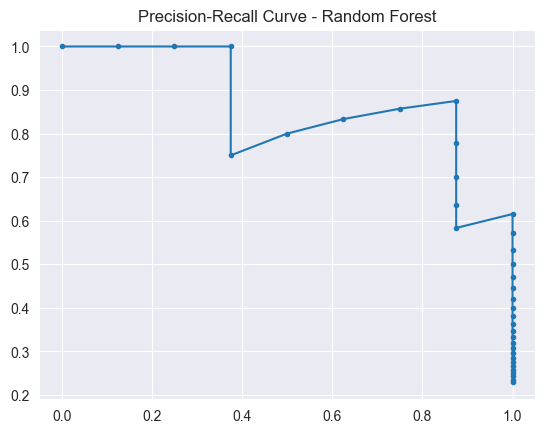

In [22]:
precision, recall, _ = precision_recall_curve(y_test, best_rf.predict_proba(X_test)[:,1])
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve - Random Forest')
plt.show()

# **Exploratory Data Analysis (EDA)**

# Correlation Heatmap

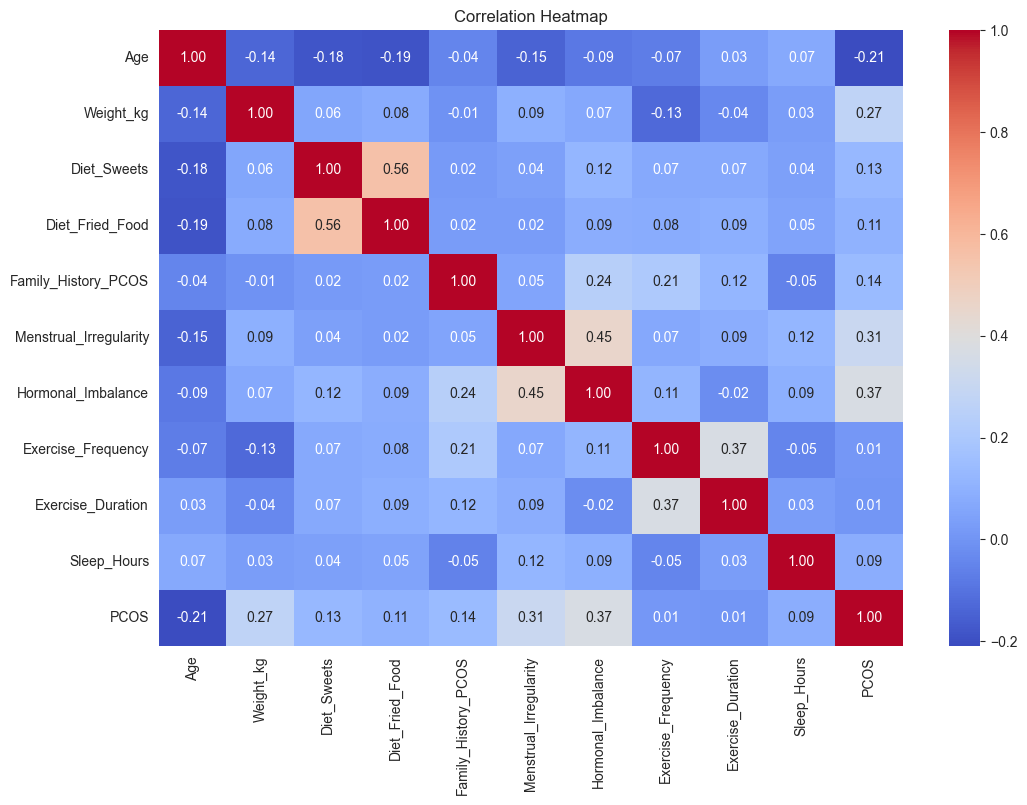

In [23]:
correlation_matrix = data_encoded[['Age','Weight_kg','Diet_Sweets', 'Diet_Fried_Food','Family_History_PCOS', 'Menstrual_Irregularity', 'Hormonal_Imbalance', 'Exercise_Frequency','Exercise_Duration','Sleep_Hours','PCOS']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for key features

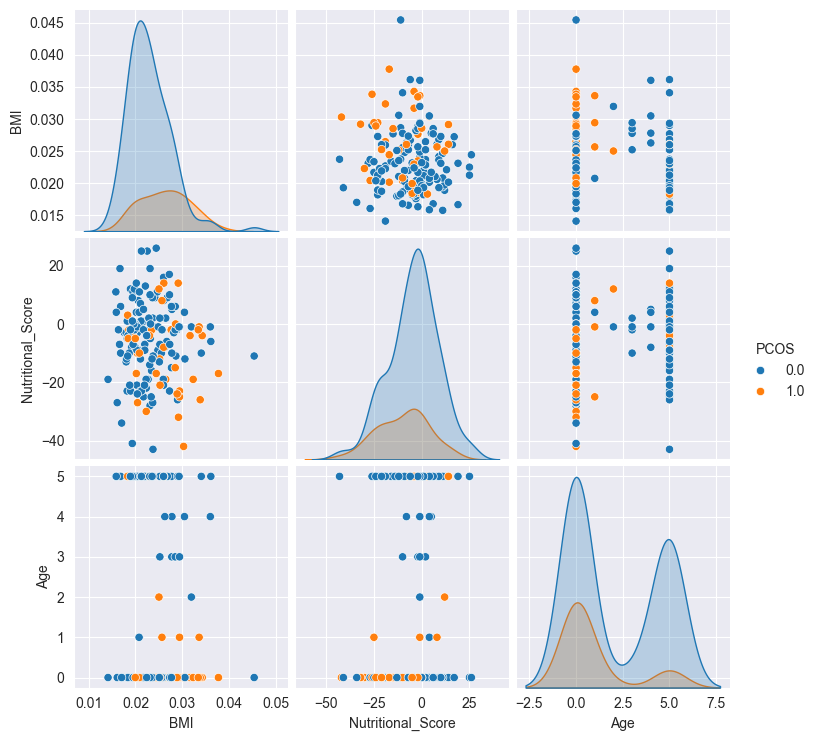

In [24]:
sns.pairplot(data_encoded[['BMI', 'Nutritional_Score', 'Age', 'PCOS']], hue='PCOS')
plt.show()

# **Deep Learning Model - TensorFlow/Keras**

In [25]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6017 - loss: 0.6876 - val_accuracy: 0.6786 - val_loss: 0.6351
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7395 - loss: 0.5464 - val_accuracy: 0.6429 - val_loss: 0.6194
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7897 - loss: 0.4868 - val_accuracy: 0.6429 - val_loss: 0.6248
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8361 - loss: 0.4592 - val_accuracy: 0.6429 - val_loss: 0.6257
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8141 - loss: 0.3955 - val_accuracy: 0.6429 - val_loss: 0.6114
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8324 - loss: 0.3720 - val_accuracy: 0.6429 - val_loss: 0.5899
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8402 - loss: 0.3242 - val_accuracy: 0.6786 - val_loss: 0.5714
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8955 - loss: 0.2884 - val_accuracy: 0.7143 - val_loss: 0.5552
Epoch 9/50


# Plot training history

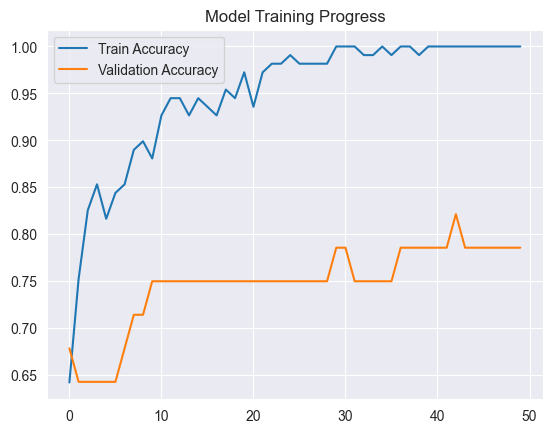

In [26]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training Progress')
plt.legend()
plt.show()

# **Gradio Interface for Real-Time Prediction**

In [ ]:
def predict_pcos(Age, BMI, Exercise_Frequency):
    # Get all feature names used during training
    expected_columns = X_train.columns.tolist()
    
    # Create a DataFrame with default 0 values for all expected columns
    input_data = {col: [0] for col in expected_columns}
    
    # Update the values for the parameters we're collecting from Gradio
    input_data.update({
        'Age': [Age],
        'BMI': [BMI],
        'Exercise_Frequency': [Exercise_Frequency],
    })
    
    # Create DataFrame with correct feature order
    input_df = pd.DataFrame(input_data, columns=expected_columns)
    
    # Scale the input data
    scaled_input = scaler.transform(input_df)
    
    # Predict using the trained model
    prediction = best_rf.predict_proba(scaled_input)[0][1]
    
    return {"PCOS Probability": prediction}


iface = gr.Interface(fn=predict_pcos, 
                    inputs=[gr.Number(label="Age"), 
                            gr.Number(label="BMI"), 
                            gr.Number(label="Exercise Frequency")], 
                    outputs="json",
                    title="PCOS Risk Predictor")

iface.launch(debug=True, inline=True)


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
